In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.shape

(7274, 3)

In [4]:
test.shape

(1819, 2)

In [5]:
train

tweet_id                                              tweet  sentiment
0         1701  #sxswnui #sxsw #apple defining language of tou...          1
1         1851  Learning ab Google doodles! All doodles should...          1
2         2689  one of the most in-your-face ex. of stealing t...          2
3         4525  This iPhone #SXSW app would b pretty awesome i...          0
4         3604  Line outside the Apple store in Austin waiting...          1
...        ...                                                ...        ...
7269      3343  @mention Google plze Tammi.  I'm in middle of ...          1
7270      5334  RT @mention ÷¼ Are you all set? ÷_ {link} ÷...          1
7271      5378  RT @mention Aha! Found proof of lactation room...          1
7272      2173  We just launched our iPad app at #SXSW! Get al...          1
7273      3162  The next fin serv battle is vs Apple, GOOG, Mo...          1

[7274 rows x 3 columns]

In [6]:
test

tweet_id                                              tweet
0         7506  Audience Q: What prototyping tools do you use?...
1         7992  At SXSW? Send Your Best Photos &amp; Videos to...
2          247  @mention  and here's a pic of you winning your...
3         7688  Google Marissa Mayer: mobile phone as a cursor...
4         3294    #SXSW Google maps is even cooler than I thought
...        ...                                                ...
1814      1550  @mention @mention @mention Hmmm....how fast ca...
1815      1933  Samsung Galaxy S II Appears At FCC And Team An...
1816      9052  @mention You could buy a new iPad 2 tmrw at th...
1817      4219  Wow very long queue of people at apple pop up ...
1818      7210  Privacy Could Headline Google Circles Social N...

[1819 rows x 2 columns]

In [7]:
train.sentiment.value_counts()

1    4311
2    2382
0     456
3     125
Name: sentiment, dtype: int64

In [8]:
#column names of dataset
train.columns

Index(['tweet_id', 'tweet', 'sentiment'], dtype='object')

In [9]:
#column names of dataset
test.columns

Index(['tweet_id', 'tweet'], dtype='object')

A) Removing Twitter Handles (@mention) : For our convenience, let’s first combine train and test set. This saves the trouble of performing the same steps twice on test and train

In [10]:
combi = train.append(test, ignore_index=True)

C:\Users\rkkir\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [11]:
combi

sentiment                                              tweet  tweet_id
0           1.0  #sxswnui #sxsw #apple defining language of tou...      1701
1           1.0  Learning ab Google doodles! All doodles should...      1851
2           2.0  one of the most in-your-face ex. of stealing t...      2689
3           0.0  This iPhone #SXSW app would b pretty awesome i...      4525
4           1.0  Line outside the Apple store in Austin waiting...      3604
...         ...                                                ...       ...
9088        NaN  @mention @mention @mention Hmmm....how fast ca...      1550
9089        NaN  Samsung Galaxy S II Appears At FCC And Team An...      1933
9090        NaN  @mention You could buy a new iPad 2 tmrw at th...      9052
9091        NaN  Wow very long queue of people at apple pop up ...      4219
9092        NaN  Privacy Could Headline Google Circles Social N...      7210

[9093 rows x 3 columns]

In [12]:
combi['tweet'] = combi['tweet'].fillna('').apply(str)

In [13]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [14]:
# remove twitter handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

In [15]:
combi

sentiment                                              tweet  tweet_id  \
0           1.0  #sxswnui #sxsw #apple defining language of tou...      1701   
1           1.0  Learning ab Google doodles! All doodles should...      1851   
2           2.0  one of the most in-your-face ex. of stealing t...      2689   
3           0.0  This iPhone #SXSW app would b pretty awesome i...      4525   
4           1.0  Line outside the Apple store in Austin waiting...      3604   
...         ...                                                ...       ...   
9088        NaN  @mention @mention @mention Hmmm....how fast ca...      1550   
9089        NaN  Samsung Galaxy S II Appears At FCC And Team An...      1933   
9090        NaN  @mention You could buy a new iPad 2 tmrw at th...      9052   
9091        NaN  Wow very long queue of people at apple pop up ...      4219   
9092        NaN  Privacy Could Headline Google Circles Social N...      7210   

                                             tidy_tweet  
0     #sxswnui #sxsw #apple defining language of tou...  
1     Learning ab Google doodles! All doodles should...  
2     one of the most in-your-face ex. of stealing t...  
3     This iPhone #SXSW app would b pretty awesome i...  
4     Line outside the Apple store in Austin waiting...  
...                                                 ...  
9088     Hmmm....how fast can #apple build a new sto...  
9089  Samsung Galaxy S II Appears At FCC And Team An...  
9090   You could buy a new iPad 2 tmrw at the Apple ...  
9091  Wow very long queue of people at apple pop up ...  
9092  Privacy Could Headline Google Circles Social N...  

[9093 rows x 4 columns]

B) Removing Punctuations, Numbers, and Special Characters. Here I will replace everything except characters and hashtags with spaces.

In [16]:
# remove special characters, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combi

sentiment                                              tweet  tweet_id  \
0           1.0  #sxswnui #sxsw #apple defining language of tou...      1701   
1           1.0  Learning ab Google doodles! All doodles should...      1851   
2           2.0  one of the most in-your-face ex. of stealing t...      2689   
3           0.0  This iPhone #SXSW app would b pretty awesome i...      4525   
4           1.0  Line outside the Apple store in Austin waiting...      3604   
...         ...                                                ...       ...   
9088        NaN  @mention @mention @mention Hmmm....how fast ca...      1550   
9089        NaN  Samsung Galaxy S II Appears At FCC And Team An...      1933   
9090        NaN  @mention You could buy a new iPad 2 tmrw at th...      9052   
9091        NaN  Wow very long queue of people at apple pop up ...      4219   
9092        NaN  Privacy Could Headline Google Circles Social N...      7210   

                                             tidy_tweet  
0     #sxswnui #sxsw #apple defining language of tou...  
1     Learning ab Google doodles  All doodles should...  
2     one of the most in your face ex  of stealing t...  
3     This iPhone #SXSW app would b pretty awesome i...  
4     Line outside the Apple store in Austin waiting...  
...                                                 ...  
9088     Hmmm    how fast can #apple build a new sto...  
9089  Samsung Galaxy S II Appears At FCC And Team An...  
9090   You could buy a new iPad   tmrw at the Apple ...  
9091  Wow very long queue of people at apple pop up ...  
9092  Privacy Could Headline Google Circles Social N...  

[9093 rows x 4 columns]

C) Removing Short Words

In [17]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi

sentiment                                              tweet  tweet_id  \
0           1.0  #sxswnui #sxsw #apple defining language of tou...      1701   
1           1.0  Learning ab Google doodles! All doodles should...      1851   
2           2.0  one of the most in-your-face ex. of stealing t...      2689   
3           0.0  This iPhone #SXSW app would b pretty awesome i...      4525   
4           1.0  Line outside the Apple store in Austin waiting...      3604   
...         ...                                                ...       ...   
9088        NaN  @mention @mention @mention Hmmm....how fast ca...      1550   
9089        NaN  Samsung Galaxy S II Appears At FCC And Team An...      1933   
9090        NaN  @mention You could buy a new iPad 2 tmrw at th...      9052   
9091        NaN  Wow very long queue of people at apple pop up ...      4219   
9092        NaN  Privacy Could Headline Google Circles Social N...      7210   

                                             tidy_tweet  
0     #sxswnui #sxsw #apple defining language touch ...  
1     Learning Google doodles doodles should light f...  
2     most your face stealing show quot #SXSW Apple ...  
3     This iPhone #SXSW would pretty awesome didn cr...  
4     Line outside Apple store Austin waiting iPad #...  
...                                                 ...  
9088       Hmmm fast #apple build store time #sxsw link  
9089  Samsung Galaxy Appears Team Android #SXSW Part...  
9090             could iPad tmrw Apple store #sxsw link  
9091  very long queue people apple store some have b...  
9092  Privacy Could Headline Google Circles Social N...  

[9093 rows x 4 columns]

D) Tokenization  Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [18]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()


0    [#sxswnui, #sxsw, #apple, defining, language, ...
1    [Learning, Google, doodles, doodles, should, l...
2    [most, your, face, stealing, show, quot, #SXSW...
3    [This, iPhone, #SXSW, would, pretty, awesome, ...
4    [Line, outside, Apple, store, Austin, waiting,...
Name: tidy_tweet, dtype: object

E) Stemming (Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word)

In [19]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [#sxswnui, #sxsw, #appl, defin, languag, touch...
1    [learn, googl, doodl, doodl, should, light, fu...
2    [most, your, face, steal, show, quot, #sxsw, a...
3    [thi, iphon, #sxsw, would, pretti, awesom, did...
4    [line, outsid, appl, store, austin, wait, ipad...
Name: tidy_tweet, dtype: object

Now let’s stitch these tokens back together.

In [20]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet

In [21]:
combi['tidy_tweet']

0       #sxswnui #sxsw #appl defin languag touch with ...
1       learn googl doodl doodl should light funni inn...
2       most your face steal show quot #sxsw appl scho...
3       thi iphon #sxsw would pretti awesom didn crash...
4       line outsid appl store austin wait ipad #sxsw ...
                              ...                        
9088          hmmm fast #appl build store time #sxsw link
9089    samsung galaxi appear team android #sxsw parti...
9090                could ipad tmrw appl store #sxsw link
9091    veri long queue peopl appl store some have bou...
9092    privaci could headlin googl circl social netwo...
Name: tidy_tweet, Length: 9093, dtype: object

## 3.  Story Generation and Visualization from Tweets

1.What are the most common words in the entire dataset? 

2.What are the most common words in the dataset for negative and positive tweets, respectively?

3.How many hashtags are there in a tweet?

4.Which trends are associated with my dataset?

5.Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

## A) Understanding the common words used in the tweets: WordCloud

Now I want to see how well the given sentiments are distributed across the train dataset. One way to accomplish this task is by understanding the common words by plotting wordclouds.

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

Let’s visualize all the words our data using the wordcloud plot.

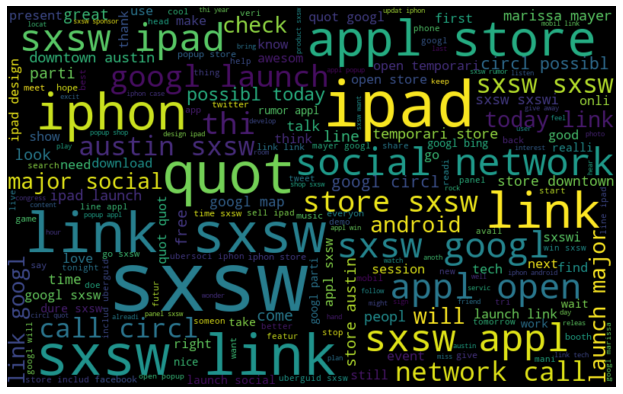

In [22]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### B) words in the tweets which are having "0" sentiment  

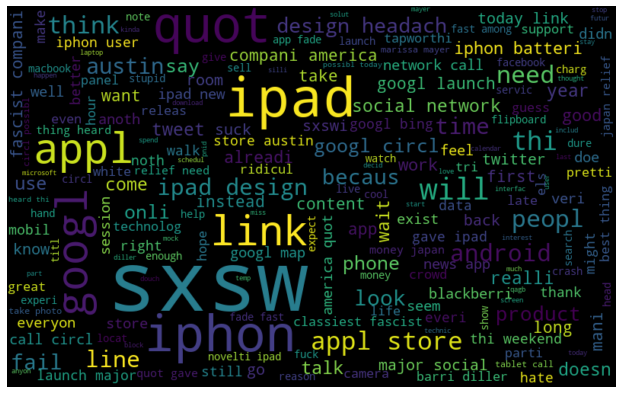

In [23]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### c) words in the tweets which are having "1" sentiment  

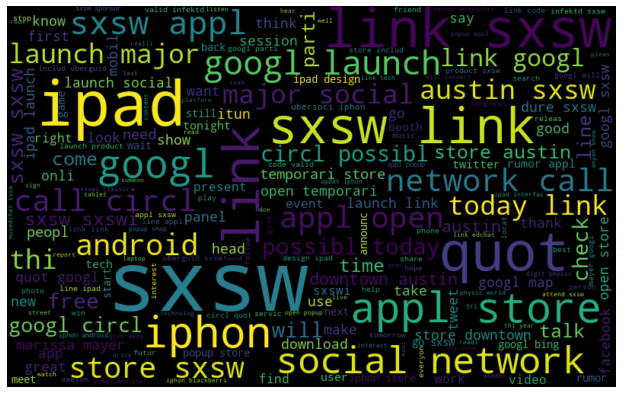

In [24]:
one_senti_words =' '.join([text for text in combi['tidy_tweet'][combi['sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(one_senti_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### D) words in the tweets which are having "2" sentiment  


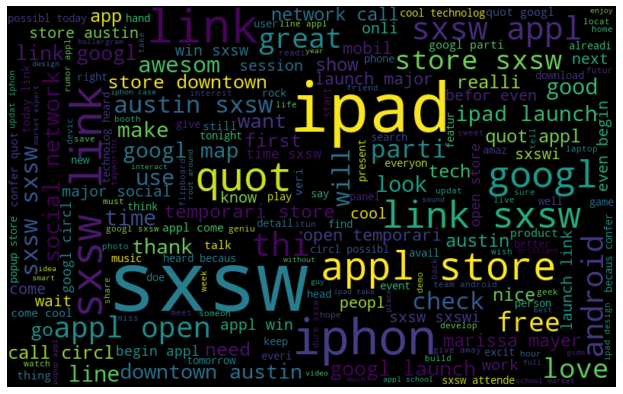

In [25]:
two_senti_words =' '.join([text for text in combi['tidy_tweet'][combi['sentiment'] == 2]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(two_senti_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### E) words in the tweets which are having "3" sentiment 

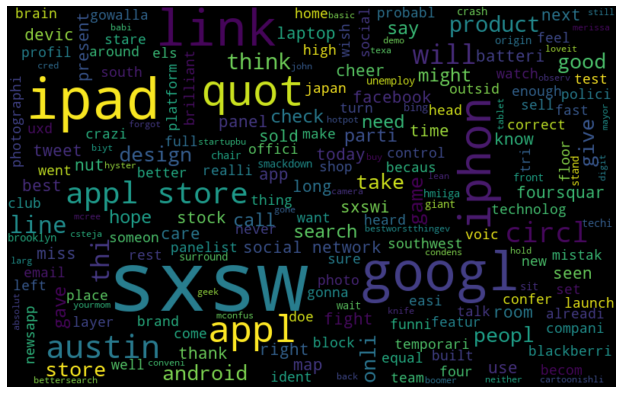

In [26]:
 
three_senti_words =' '.join([text for text in combi['tidy_tweet'][combi['sentiment'] == 3]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(three_senti_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Understanding the impact of Hashtags on tweets sentiment

Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time. We should try to check whether these hashtags add any value to our sentiment analysis task, i.e., they help in distinguishing tweets into the different sentiments.

In [27]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [28]:
# extracting hashtags from sentiments zero tweets

HT_sentiments_zero = hashtag_extract(combi['tidy_tweet'][combi['sentiment'] == 0])
#HT_sentiments_zero

# extracting hashtags from sentiments one tweets

HT_sentiments_one = hashtag_extract(combi['tidy_tweet'][combi['sentiment'] == 1])
#HT_sentiments_one

# extracting hashtags from sentiments two tweets

HT_sentiments_two = hashtag_extract(combi['tidy_tweet'][combi['sentiment'] == 2])
#HT_sentiments_two


# extracting hashtags from sentiments three tweets

HT_sentiments_three = hashtag_extract(combi['tidy_tweet'][combi['sentiment'] == 3])
#HT_sentiments_three

In [29]:
# unnesting list
HT_sentiments_zero = sum(HT_sentiments_zero,[])

HT_sentiments_zero

['sxsw',
 'fuckit',
 'illmakeitwork',
 'rise',
 'sxsw',
 'ipad',
 'sxsw',
 'psych',
 'sxsw',
 'twitterpow',
 'sxsw',
 'imthatgood',
 'sxsw',
 'netflixiphon',
 'ipad',
 'sxsw',
 'sxsw',
 'fail',
 'owllov',
 'sxsw',
 'enchant',
 'sxsw',
 'sxswi',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'qagb',
 'sxsw',
 'sxsw',
 'sxsw',
 'cnngrill',
 'sxsw',
 'sxsw',
 'csr',
 'sxsw',
 'mullenweg',
 'sxsw',
 'sxsw',
 'sxsw',
 'cnn',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'googl',
 'circl',
 'social',
 'sxsw',
 'sxsw',
 'sxsw',
 'osmpw',
 'sxsw',
 'sxsw',
 'ipad',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'fail',
 'googl',
 'sxsw',
 'pnid',
 'sxsw',
 'sxswi',
 'sxsw',
 'ipad',
 'sxsw',
 'tapworthi',
 'sxsw',
 'futuremf',
 'sxsw',
 'ogilvynot',
 'sxsw',
 'appl',
 'sxsw',
 'rji',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'socialfuel',
 'sxsw',
 'seenocreepi',
 'sxsw',
 'pnid',
 'sxsw',
 'sxsw',
 'sxsw',
 'web',
 'saatchini',
 'sxsw',
 'ipad',
 'app',
 'media',
 'sxsw',
 'sxsw',
 'tapwort

In [30]:
HT_sentiments_one = sum(HT_sentiments_one,[])
HT_sentiments_one

['sxswnui',
 'sxsw',
 'appl',
 'googledoodl',
 'sxsw',
 'sxsw',
 'technew',
 'tech',
 'appl',
 'ipad',
 'sxsw',
 'tablet',
 'tech',
 'sxsw',
 'ipad',
 'ubersoci',
 'iphon',
 'sxsw',
 'mashabl',
 'sxsw',
 'zazzlsxsw',
 'compani',
 'sxsw',
 'app',
 'featur',
 'hardwar',
 'ipad',
 'iphon',
 'sxsw',
 'calyp',
 'calyp',
 'sxsw',
 'appl',
 'ipad',
 'technolog',
 'itun',
 'sxsw',
 'sxsw',
 'doublelos',
 'sxsw',
 'sxsw',
 'circl',
 'sxsw',
 'circl',
 'sxsw',
 'sxsw',
 'sxsw',
 'startup',
 'movi',
 'awesom',
 'sxsw',
 'ipad',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'deferomobil',
 'ipad',
 'sxsw',
 'sxsw',
 'appl',
 'ipad',
 'sxsw',
 'android',
 'iphon',
 'sm',
 'stevemartocci',
 'sxsw',
 'entri',
 'friend',
 'hous',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'recco',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'googlecircl',
 'googlem',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'ipad',
 'sxsw',
 'googl',
 'circl',
 'sxsw',
 'bjdproduct',
 'appl',
 'sxsw',
 'tech',
 'sxs

In [31]:
HT_sentiments_two = sum(HT_sentiments_two,[])
HT_sentiments_two

['sxsw',
 'sxsw',
 'freemus',
 'sxsw',
 'sxsw',
 'elev',
 'sxsw',
 'techenvi',
 'sxsw',
 'sxsw',
 'sxsw',
 'appl',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'ipad',
 'sxsw',
 'tech',
 'lightbox',
 'android',
 'sxsw',
 'technolog',
 'sxsw',
 'sxswi',
 'sxsw',
 'ipad',
 'sxsw',
 'lovemusicapi',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'tech',
 'sxsw',
 'sxsw',
 'sxsw',
 'appl',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxflip',
 'sxsw',
 'gsdm',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxswi',
 'sxsw',
 'sxsw',
 'sxsw',
 'usguy',
 'sxsw',
 'appl',
 'sxsw',
 'sxsw',
 'sxsw',
 'seattl',
 'sxsw',
 'sxsw',
 'social',
 'sxsw',
 'appl',
 'sxsw',
 'sxsw',
 'googl',
 'googl',
 'circl',
 'sxsw',
 'socbiz',
 'sxsw',
 'sxsw',
 'sxswi',
 'sxsw',
 'sxsw',
 'sxsw',
 'augmentedr',
 'sxsw',
 'minimalistprogram',
 'marissagoogl',
 'sxsw',
 'sxsw',
 'sxsw',
 'fxsw',
 'appl',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'ip

In [32]:
HT_sentiments_three = sum(HT_sentiments_three,[])
HT_sentiments_three

['sxsw',
 'android',
 'iphon',
 'ipad',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'bestworstthingev',
 'merissa',
 'mayor',
 'sxsw',
 'loveit',
 'sxsw',
 'startupbu',
 'sxsw',
 'sxsw',
 'newsapp',
 'sxsw',
 'ipad',
 'sxsw',
 'yourmom',
 'sxsw',
 'csteja',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'ipad',
 'appl',
 'new',
 'sxswi',
 'bettersearch',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'appl',
 'austin',
 'sxsw',
 'ipad',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'doyoureallyneedthat',
 'sxsw',
 'uxd',
 'ipad',
 'sxsw',
 'sxsw',
 'sxsw',
 'socialnetwork',
 'googl',
 'circl',
 'facebook',
 'sxsw',
 'busi',
 'sxsw',
 'disagre',
 'sxsw',
 'uxd',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'mobilesearch',
 'sxsw',
 'sxswi',
 'sxsw',
 'sxsw',
 'googl',
 'coudbeeasi',
 'openbeta',
 'sxsw',
 'usguy',
 'dgtltribe',
 'sxswbuffalo',
 'sxsw',
 'netflixiphon',
 'arabspr',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'sxsw',
 'psfk',
 'sxsw',
 'mccan

Now that we have prepared our lists of hashtags for 0,1,2,3 sentiments, we can plot the top n hashtags.

 So, first let’s check the hashtags in the 0 sentiment tweets.

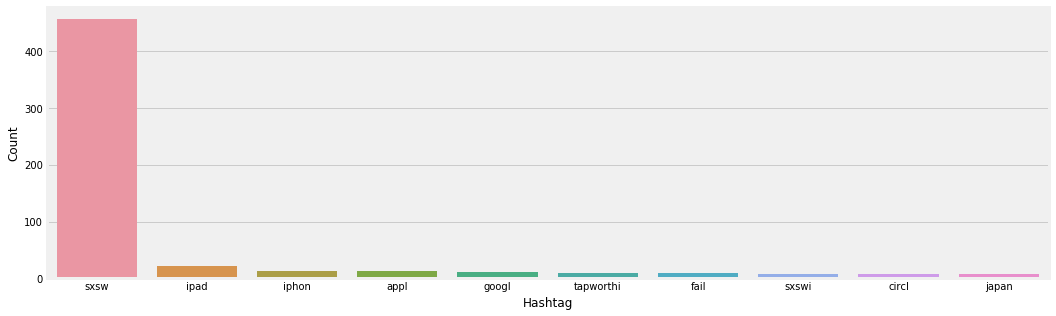

In [33]:
a = nltk.FreqDist(HT_sentiments_zero)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

 ##  let’s check the hashtags in the 1 sentiment tweets.

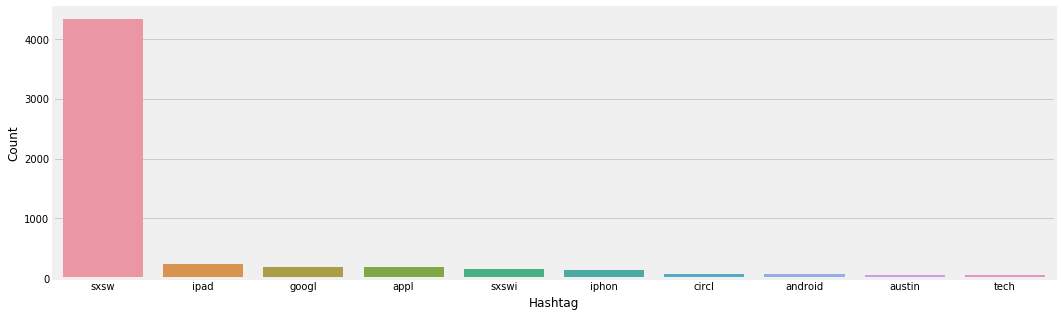

In [34]:
a = nltk.FreqDist(HT_sentiments_one)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

 ##  let’s check the hashtags in the 2 sentiment tweets.

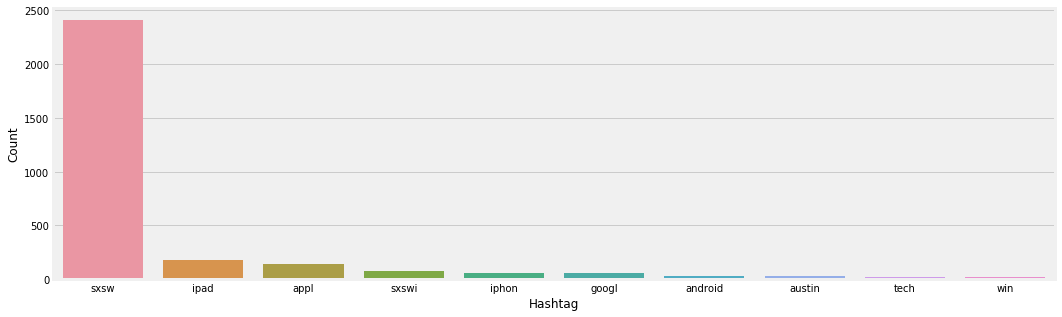

In [35]:
a = nltk.FreqDist(HT_sentiments_two)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

 ##  let’s check the hashtags in the 3 sentiment tweets.


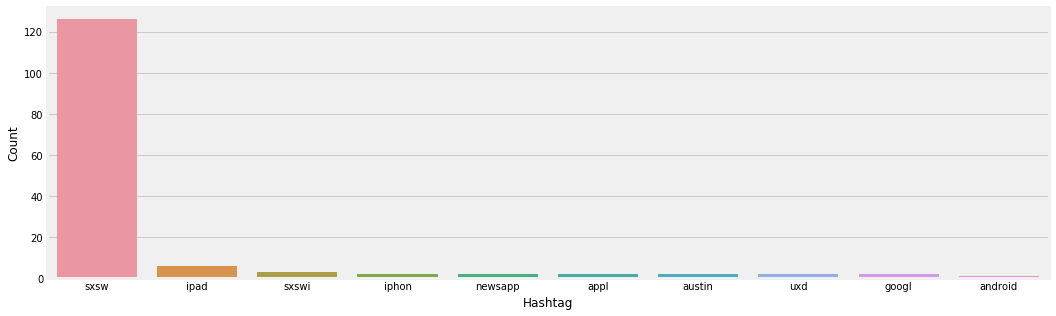

In [36]:
a = nltk.FreqDist(HT_sentiments_three)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
   
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

# 4. Extracting Features from Cleaned Tweets

Bag-of-Words Features : Bag-of-Words is a method to represent text into numerical features

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow

<9093x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 60611 stored elements in Compressed Sparse Row format>

TF-IDF Features : This is another method which is based on the frequency method but it is different to the bag-of-words approach in the sense that it takes into account, not just the occurrence of a word in a single document (or tweet) but in the entire corpus.

TF-IDF works by penalizing the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.

Let’s have a look at the important terms related to TF-IDF:

TF = (Number of times term t appears in a document)/(Number of terms in the document)
IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.
TF-IDF = TF*IDF

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

# 5. Model Building: Sentiment Analysis

We are now done with all the pre-modeling stages required to get the data in the proper form and shape. Now we will be building predictive models on the dataset using the two feature set — Bag-of-Words and TF-IDF.

We will use logistic regression to build the models. It predicts the probability of occurrence of an event by fitting data to a logit function.

The following equation is used in Logistic Regression:




A) Building model using Bag-of-Words features

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:7274,:]
test_bow = bow[7274:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['sentiment'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict(xvalid_bow) # predicting on the validation set
#prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
#prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction,average="micro") # calculating f1 score

C:\Users\rkkir\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rkkir\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6481905634448007

We trained the logistic regression model on the Bag-of-Words features and it gave us an F1-score of 0.64 for the validation set. Now we will use this model to predict for the test data.

In [40]:
test_pred = lreg.predict(test_bow)
#test_pred_int = test_pred[:,1] >= 0.3
#test_pred_int = test_pred_int.astype(np.int)
test['sentiment'] = test_pred
submission = test[['tweet_id','sentiment']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

B) Building model using TF-IDF features

In [41]:
train_tfidf = tfidf[:7274,:]
test_tfidf = tfidf[7274:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict(xvalid_tfidf)
#prediction_int = prediction[:,1] >= 0.3
#prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction,average="micro")

0.6495648190563444

In [42]:
test_pred = lreg.predict(test_tfidf)
#test_pred_int = test_pred[:,1] >= 0.3
#test_pred_int = test_pred_int.astype(np.int)
test['sentiment'] = test_pred
submission = test[['tweet_id','sentiment']]
submission.to_csv('sub_lreg_tfidf.csv', index=False) # writing data to a CSV file